<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Multivariate_Time_Series_using_VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="VN Index In Colab"/></a>

In [70]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import datetime

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Libraries to define the required functions
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen

from pmdarima.model_selection import train_test_split as time_train_test_split
from sklearn import metrics
from sklearn.model_selection import ParameterGrid

from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from pmdarima import auto_arima


import warnings
warnings.filterwarnings("ignore")


In [2]:
oil_price_df=pd.read_csv('Dữ liệu Lịch sử Hợp Đồng Tương Lai Dầu Thô WTI.csv', index_col=0, parse_dates=True)
exchange_rate_df=pd.read_csv('Dữ liệu Lịch sử USD_VND.csv', index_col=0, parse_dates=True)
gold_price_df=pd.read_csv('Dữ liệu Lịch sử Hợp đồng Tương lai Vàng.csv', index_col=0, parse_dates=True)
vnindex_df=pd.read_csv('Dữ liệu Lịch sử VN Index.csv', index_col=0, parse_dates=True)
sp500_df=pd.read_csv('Dữ liệu Lịch sử S&P 500.csv', index_col=0, parse_dates=True)

In [3]:
vnindex_df.count()

Lần cuối      3344
Mở            3344
Cao           3344
Thấp          3344
KL            3344
% Thay đổi    3344
dtype: int64

In [4]:
oil_price_df.head(5)

,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
Ngày,,,,,,
2009-02-01,46.34,43.72,46.74,41.05,184.68K,3.90%
2009-05-01,48.81,47.04,49.28,45.56,258.76K,5.33%
2009-06-01,48.58,48.40,50.47,47.60,331.31K,-0.47%
2009-07-01,42.63,48.41,49.09,42.41,306.26K,-12.25%
2009-08-01,41.70,42.63,43.63,40.54,312.49K,-2.18%


In [5]:
exchange_rate_df

,Lần cuối,Mở,Cao,Thấp,% Thay đổi
Ngày,,,,,
2009-01-01,"17,483.0","17,480.0","17,483.0","17,480.0",0.00%
2009-02-01,"17,479.0","17,420.0","17,535.0","17,400.0",-0.02%
2009-05-01,"17,472.0","17,480.0","17,540.0","17,400.0",-0.04%
2009-06-01,"17,477.5","17,400.0","17,531.5","17,400.0",0.03%
2009-07-01,"17,478.5","17,400.0","17,532.5","17,400.0",0.01%
...,...,...,...,...,...
2022-05-25,"23,190.0","23,208.0","23,215.0","23,170.0",-0.09%
2022-05-26,"23,205.0","23,200.0","23,215.0","23,195.0",0.06%
2022-05-27,"23,195.0","23,210.0","23,210.0","23,188.0",-0.04%


In [6]:
gold_price_df.sort_index(axis=0, ascending=True, inplace=True)

In [7]:
gold_price_df

,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
Ngày,,,,,,
2009-01-04,926.10,918.60,932.50,916.90,3.66K,0.38%
2009-01-05,887.60,884.00,888.50,881.50,0.51K,-0.35%
2009-01-06,978.60,978.80,988.10,973.00,2.88K,-0.02%
2009-01-07,941.00,929.30,944.20,928.00,0.09K,1.50%
2009-01-09,954.70,954.20,956.50,948.70,0.02K,0.32%
...,...,...,...,...,...,...
2022-11-04,"1,955.00","1,957.10","1,981.20","1,949.90",5.74K,0.14%
2022-11-05,"1,861.00","1,844.90","1,864.50","1,838.00",60.05K,0.68%
2022-12-01,"1,833.70","1,827.10","1,834.00","1,820.80",3.28K,0.50%


In [8]:
vnindex_df

,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
Ngày,,,,,,
2009-02-01,313.34,312.49,313.34,312.18,5.63K,-0.72%
2009-05-01,311.91,308.77,311.91,308.25,7.92K,-0.46%
2009-06-01,314.04,312.91,315.02,312.88,12.97K,0.68%
2009-07-01,319.58,320.40,322.59,319.29,14.75K,1.76%
2009-08-01,314.15,315.92,318.79,313.04,14.94K,-1.70%
...,...,...,...,...,...,...
2022-05-25,"1,268.43","1,233.38","1,268.43","1,233.38",655.24K,2.84%
2022-05-26,"1,268.57","1,268.43","1,278.11","1,261.55",541.91K,0.01%
2022-05-27,"1,285.45","1,268.57","1,286.99","1,268.57",607.22K,1.33%


In [9]:
exchange_rate_df[['Lần cuối']]

,Lần cuối
Ngày,
2009-01-01,"17,483.0"
2009-02-01,"17,479.0"
2009-05-01,"17,472.0"
2009-06-01,"17,477.5"
2009-07-01,"17,478.5"
...,...
2022-05-25,"23,190.0"
2022-05-26,"23,205.0"
2022-05-27,"23,195.0"


In [10]:
df_arr = [exchange_rate_df, oil_price_df, gold_price_df, vnindex_df, sp500_df]
df_name = ['Exchange Rate', 'Oil price', 'Gold price', 'VN Index', 'S&P500']
mindate = exchange_rate_df.index.min()
maxdate = datetime.datetime.strptime('2022-05-31', '%Y-%m-%d')
# maxdate = exchange_rate_df.index.max()
index = pd.date_range(start=mindate, end=maxdate, freq='D')

df = pd.DataFrame(index=index)
# df = exchange_rate_df[['Lần cuối']]
# df.rename(columns={'Lần cuối': df_name[0]}, inplace=True)
for index in range(0, len(df_arr), 1):
    dataframe = df_arr[index]
    # df.join(dataframe, how='outer')
    df = pd.concat([df, dataframe[['Lần cuối']]], axis=1)
    df.rename(columns={'Lần cuối': df_name[index]}, inplace=True)

In [11]:
pd.date_range(start=mindate, end=maxdate, freq='D')

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2022-05-22', '2022-05-23', '2022-05-24', '2022-05-25',
               '2022-05-26', '2022-05-27', '2022-05-28', '2022-05-29',
               '2022-05-30', '2022-05-31'],
              dtype='datetime64[ns]', length=4899, freq='D')

In [12]:
index

4

In [13]:
df.isna().sum()

Exchange Rate    1448
Oil price        1445
Gold price       1437
VN Index         1580
S&P500           1548
dtype: int64

In [14]:
df.fillna(method='ffill', inplace=True)

In [15]:
df.dropna(inplace=True)

In [16]:
df.isna().sum()

Exchange Rate    0
Oil price        0
Gold price       0
VN Index         0
S&P500           0
dtype: int64

In [17]:
df = df.replace(',','', regex=True)

df = df.replace('%','', regex=True)


In [18]:
df.columns

Index(['Exchange Rate', 'Oil price', 'Gold price', 'VN Index', 'S&P500'], dtype='object')

In [19]:
df = df[df.index >= datetime.datetime.strptime('2012-01-01', '%Y-%m-%d') ] 
df = df[df.index < datetime.datetime.strptime('2022-06-01', '%Y-%m-%d') ] 

In [20]:
for col in df.columns:
    df[col] = df[col].astype(np.float32)

In [21]:
df

,Exchange Rate,Oil price,Gold price,VN Index,S&P500
2012-01-01,21033.5,98.830002,1565.800049,351.549988,1257.599976
2012-01-02,21008.0,97.610001,1747.099976,390.670013,1324.089966
2012-01-03,20845.0,108.839996,1721.099976,427.950012,1374.089966
2012-01-04,20845.0,108.839996,1721.099976,427.950012,1374.089966
2012-01-05,20865.0,106.160004,1661.699951,427.950012,1405.819946
...,...,...,...,...,...
2022-05-27,23195.0,115.070000,1857.300049,1285.449951,4158.240234
2022-05-28,23195.0,115.070000,1857.300049,1285.449951,4158.240234
2022-05-29,23195.0,115.610001,1847.650024,1285.449951,4158.240234
2022-05-30,23176.0,117.610001,1855.400024,1293.920044,4158.240234


In [22]:
df.index = pd.DatetimeIndex(df.index).to_period(freq='D')

In [23]:
# ds = df[df.index > '2021-01-01']

In [24]:
# df=df.resample('1D').mean()

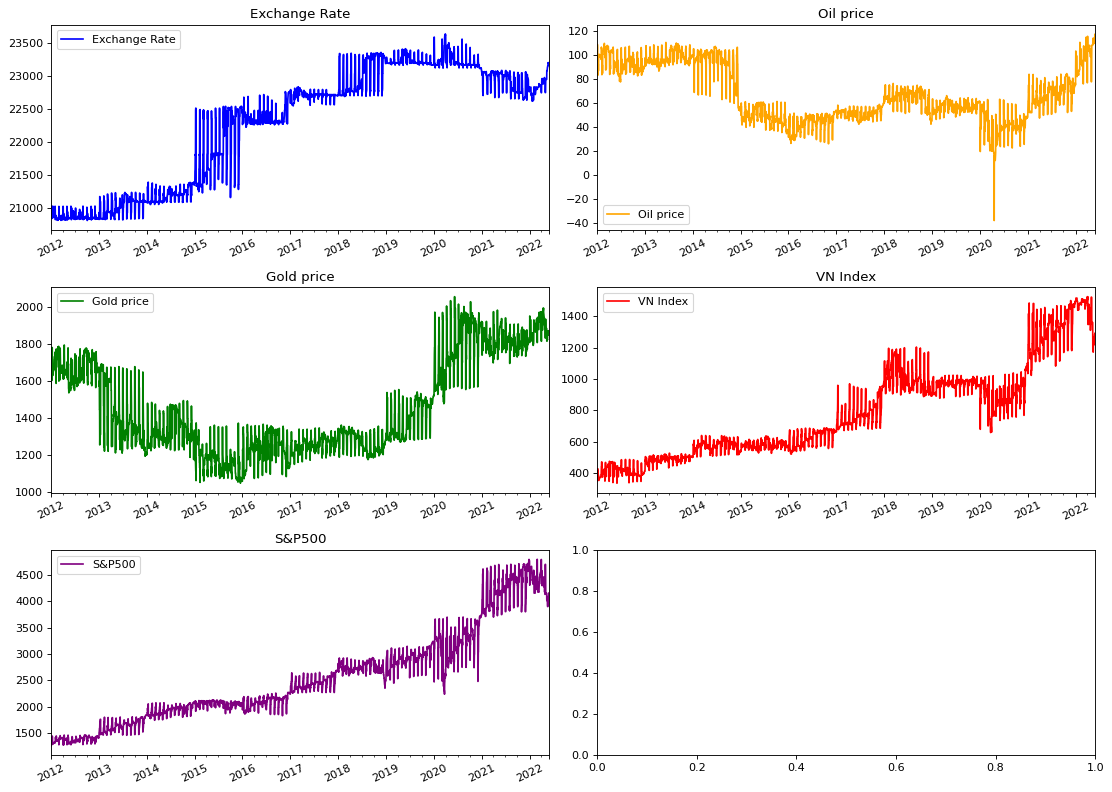

In [25]:
color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]


def Visualize(data):
    features= list(df.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(14, feature_size*2), dpi=80, facecolor="w", edgecolor="k"
    )
    # print('feature size ', feature_size)
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.head()
        # print(i//2, i%2)
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(key),
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()


Visualize(df)

Null Hypothesis - Series possesses a unit root and hence is not stationary

Alternate Hypothesis - Series is stationary

In [26]:
def check_stationary(df):
  for i in range(len(df.columns)):
    result = adfuller(df[df.columns[i]])

    if result[1] > 0.05 :
      print('{} - Series is not Stationary'.format(df.columns[i]))
    else:
      print('{} - Series is Stationary'.format(df.columns[i]))

In [27]:
check_stationary(df)

Exchange Rate - Series is not Stationary
Oil price - Series is not Stationary
Gold price - Series is not Stationary
VN Index - Series is not Stationary
S&P500 - Series is not Stationary


In [28]:
df

,Exchange Rate,Oil price,Gold price,VN Index,S&P500
2012-01-01,21033.5,98.830002,1565.800049,351.549988,1257.599976
2012-01-02,21008.0,97.610001,1747.099976,390.670013,1324.089966
2012-01-03,20845.0,108.839996,1721.099976,427.950012,1374.089966
2012-01-04,20845.0,108.839996,1721.099976,427.950012,1374.089966
2012-01-05,20865.0,106.160004,1661.699951,427.950012,1405.819946
...,...,...,...,...,...
2022-05-27,23195.0,115.070000,1857.300049,1285.449951,4158.240234
2022-05-28,23195.0,115.070000,1857.300049,1285.449951,4158.240234
2022-05-29,23195.0,115.610001,1847.650024,1285.449951,4158.240234
2022-05-30,23176.0,117.610001,1855.400024,1293.920044,4158.240234


In [29]:
copy_df = df.copy()

In [30]:
origin_df = df.copy()

In [31]:
for i in range(len(copy_df.columns)):
    result = adfuller(copy_df[copy_df.columns[i]])
    if result[1] > 0.05 :
        copy_df[copy_df.columns[i]] = df[copy_df.columns[i]] - df[copy_df.columns[i]].shift(1)
        copy_df.fillna(method='ffill', inplace=True)
copy_df.dropna(inplace=True)

In [32]:
copy_df

,Exchange Rate,Oil price,Gold price,VN Index,S&P500
2012-01-02,-25.5,-1.220001,181.299927,39.120026,66.489990
2012-01-03,-163.0,11.229996,-26.000000,37.279999,50.000000
2012-01-04,0.0,0.000000,0.000000,0.000000,0.000000
2012-01-05,20.0,-2.679993,-59.400024,0.000000,31.729980
2012-01-06,0.0,-22.930000,-41.199951,0.849976,-127.779907
...,...,...,...,...,...
2022-05-27,-10.0,0.980003,3.400024,16.880005,100.400146
2022-05-28,0.0,0.000000,0.000000,0.000000,0.000000
2022-05-29,0.0,0.540001,-9.650024,0.000000,0.000000
2022-05-30,-19.0,2.000000,7.750000,8.470093,0.000000


In [33]:
check_stationary(copy_df)

Exchange Rate - Series is Stationary
Oil price - Series is Stationary
Gold price - Series is Stationary
VN Index - Series is Stationary
S&P500 - Series is Stationary


In [34]:
df.diff().fillna(method='ffill').head(5)

,Exchange Rate,Oil price,Gold price,VN Index,S&P500
2012-01-01,NaN,NaN,NaN,NaN,NaN
2012-01-02,-25.5,-1.220001,181.299927,39.120026,66.48999
2012-01-03,-163.0,11.229996,-26.000000,37.279999,50.00000
2012-01-04,0.0,0.000000,0.000000,0.000000,0.00000
2012-01-05,20.0,-2.679993,-59.400024,0.000000,31.72998


In [35]:
copy_df.head(5)

,Exchange Rate,Oil price,Gold price,VN Index,S&P500
2012-01-02,-25.5,-1.220001,181.299927,39.120026,66.489990
2012-01-03,-163.0,11.229996,-26.000000,37.279999,50.000000
2012-01-04,0.0,0.000000,0.000000,0.000000,0.000000
2012-01-05,20.0,-2.679993,-59.400024,0.000000,31.729980
2012-01-06,0.0,-22.930000,-41.199951,0.849976,-127.779907


In [36]:
df = copy_df

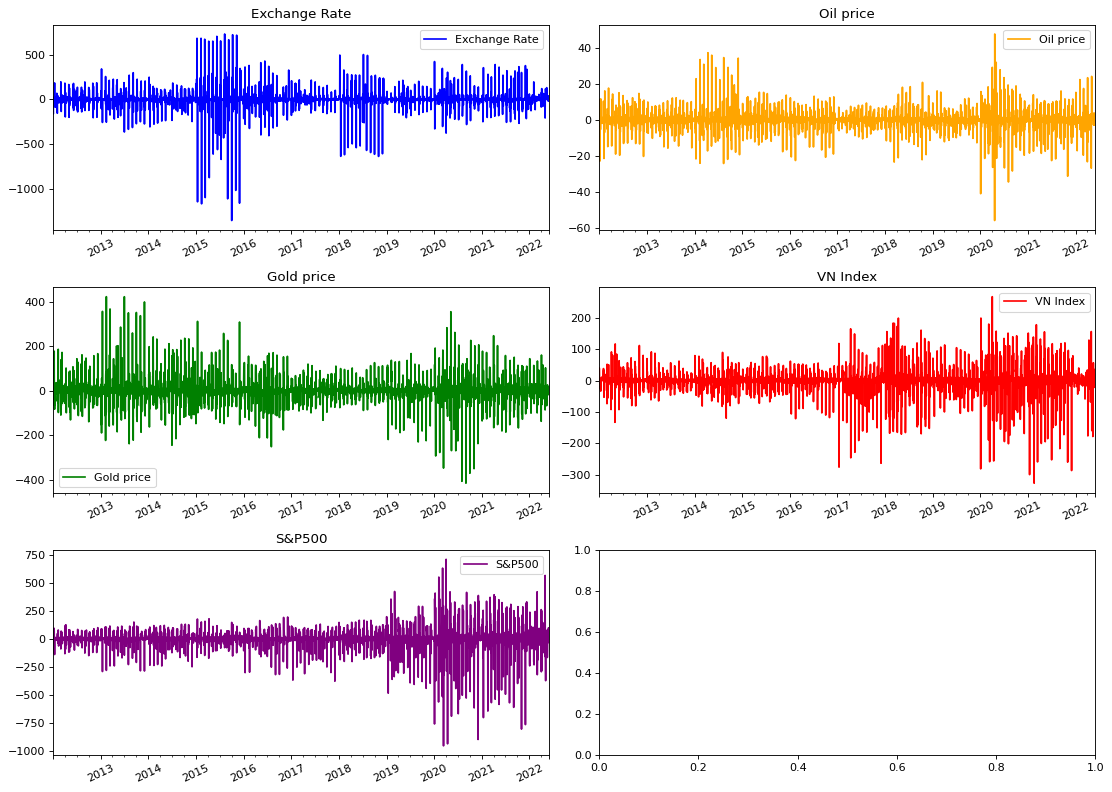

In [37]:
Visualize(df)

 H0: Xt does not granger causes Yt
 
 H1: Xt granger causes Yt

In [38]:
max_lags=12
y='VN Index'

In [39]:
# grangercausalitytests(df[[y,'Gold_1_diff']], max_lags, verbose=False)

In [40]:
df.columns

Index(['Exchange Rate', 'Oil price', 'Gold price', 'VN Index', 'S&P500'], dtype='object')

In [41]:
# results = grangercausalitytests(df[[y,'Oil_1_diff']], max_lags, verbose=False)
# results['Oil price'][0]['ssr_ftest'][1]

In [42]:
for i in range(0,len(df.columns)):
  results=grangercausalitytests(df[[y,df.columns[i]]], max_lags, verbose=False)
  p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
  print('Column - {} : P_Values - {}'.format(df.columns[i],p_values))

Column - Exchange Rate : P_Values - [0.083, 0.2148, 0.0001, 0.0001, 0.0002, 0.0005, 0.0004, 0.0006, 0.0005, 0.0009, 0.0017, 0.0021]
Column - Oil price : P_Values - [0.0044, 0.0189, 0.0386, 0.0002, 0.0, 0.0001, 0.0003, 0.0003, 0.0008, 0.0013, 0.0001, 0.0005]
Column - Gold price : P_Values - [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - VN Index : P_Values - [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Column - S&P500 : P_Values - [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [43]:
# df =df[['Exchange Rate', 'Oil price','Gold price','S&P500', 'VN Index']]
df =df[['Oil price','S&P500', 'Gold price', 'VN Index']]

In [44]:
df

,Oil price,S&P500,Gold price,VN Index
2012-01-02,-1.220001,66.489990,181.299927,39.120026
2012-01-03,11.229996,50.000000,-26.000000,37.279999
2012-01-04,0.000000,0.000000,0.000000,0.000000
2012-01-05,-2.679993,31.729980,-59.400024,0.000000
2012-01-06,-22.930000,-127.779907,-41.199951,0.849976
...,...,...,...,...
2022-05-27,0.980003,100.400146,3.400024,16.880005
2022-05-28,0.000000,0.000000,0.000000,0.000000
2022-05-29,0.540001,0.000000,-9.650024,0.000000
2022-05-30,2.000000,0.000000,7.750000,8.470093


In [45]:
# df_train = df[:int(0.9*(len(df)))]
# df_test = df[int(0.9*(len(df))):]
origin_df = origin_df[df.columns]
# df_train, df_test = origin_df[0:-nobs], origin_df[-nobs:]
nobs = 6
df_train = origin_df[:-nobs]
df_test = origin_df[-nobs:]

nobs = len(df_test)

# Check size
print(df_train.shape) 
print(df_test.shape)

(3798, 4)
(6, 4)


In [46]:
# df_train.shape

In [47]:
# df_test.shape

![link text](https://wikimedia.org/api/rest_v1/media/math/render/svg/d79bead4e9192d7fe2470a7936e4623e9ff252e1)

![link text](https://wikimedia.org/api/rest_v1/media/math/render/svg/d88ac4002c0641b2e93fb6d35f961ea63352b6a9)

In [71]:
param_grid = {'p': [1,2,3], 'q':[1,2,3], 'tr': ['n','c','t','ct']}
pg = list(ParameterGrid(param_grid))

In [73]:
train_diff = df_train.diff()
train_diff.dropna(inplace = True)


In [74]:
testX = df_test

In [75]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [81]:
model = VARMAX(train_diff, order=(1,2), trend=tr).fit()
z = model.forecast(y=train_diff[['VN Index', 'Oil Price', 'Gold price', 'S&P500']].values, steps=len(testX))
df_pred = pd.DataFrame(z, columns=[ 'VN Index', 'Oil price', 'Gold price', 'S&P500'])
res = invert_transformation(df_train[['VN Index', 'Oil price', 'Gold price', 'S&P500']],df_pred)

KeyError: "['Oil Price'] not in index"

In [78]:
df_results_VARMA = pd.DataFrame(columns=['p', 'q', 'tr','RMSE VN Index','RMSE Oil price','RMSE Gold price','RMSE S&P500'])

for a,b in enumerate(pg):
    p = b.get('p')
    q = b.get('q')
    tr = b.get('tr')
    model = VARMAX(train_diff, order=(p,q), trend=tr).fit()
    z = model.forecast(y=train_diff[['VN Index', 'Oil Price', 'Gold price', 'S&P500']].values, steps=len(testX))
    df_pred = pd.DataFrame(z, columns=[ 'VN Index', 'Oil price', 'Gold price', 'S&P500'])
    res = invert_transformation(df_train[['VN Index', 'Oil price', 'Gold price', 'S&P500']],df_pred)
    VNIndexrmse = np.sqrt(metrics.mean_squared_error(testX['VN Index'], res['VN Index']))
    Oilpricermse = np.sqrt(metrics.mean_squared_error(testX['Oil price'], res['Oil price']))
    Goldpricermse = np.sqrt(metrics.mean_squared_error(testX['Gold price'], res['Gold price']))
    SP500rmse = np.sqrt(metrics.mean_squared_error(testX['S&P500'], res['S&P500']))
    df_results_VARMA = df_results_VARMA.append({'p': p, 'q': q, 'tr': tr,'RMSE VN Index': VNIndexrmse,
                                                'RMSE Oil price':Oilpricermse,'RMSE Gold price':Goldpricermse,
                                                'RMSE S&P500':SP500rmse }, ignore_index=True)


KeyError: "['Oil Price'] not in index"

In [48]:
model = VAR(df)
# for i in range(48):
#     results = model.fit(i+1)
#     print('Order = ', i, '=========================')
#     print('AIC: ', results.aic)
#     print('BIC: ', results.bic)
#     print('\n')

In [49]:
model.select_order(30).summary()

,AIC,BIC,FPE,HQIC
0,26.94,26.95,5.021e+11,26.94
1,26.87,26.90,4.654e+11,26.88
2,26.82,26.88,4.438e+11,26.84
3,26.74,26.82,4.095e+11,26.77
4,26.72,26.83,4.005e+11,26.76
5,26.69,26.83,3.906e+11,26.74
6,26.65,26.81*,3.741e+11,26.71
7,26.63,26.82,3.665e+11,26.70
8,26.60,26.82,3.578e+11,26.68
9,26.59,26.83,3.529e+11,26.68


In [50]:
model = VAR(df)
fitted_model = model.fit(maxlags=18, ic='aic')

In [51]:
print(fitted_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 10, Jun, 2022
Time:                     15:30:44
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    26.9093
Nobs:                     3789.00    HQIC:                   26.6673
Log likelihood:          -71545.8    FPE:                3.33807e+11
AIC:                      26.5338    Det(Omega_mle):     3.14453e+11
--------------------------------------------------------------------
Results for equation Oil price
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.007314         0.076797            0.095           0.924
L1.Oil price          -0.212759         0.017608          -12.083           0.000
L1.S&P500              0.002862         0.001074    

In [52]:
def adjust(val, length= 6): return str(val).ljust(length)

In [53]:
# model = VAR(df)
# fitted_model = model.fit(4)

In [54]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(fitted_model.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

Oil price : 2.0
S&P500 : 2.0
Gold price : 2.0
VN Index : 2.01


In [55]:
df.index[-6:]

PeriodIndex(['2022-05-26', '2022-05-27', '2022-05-28', '2022-05-29',
             '2022-05-30', '2022-05-31'],
            dtype='period[D]')

In [56]:
lag_order = fitted_model.k_ar
print(lag_order)  #> 5

# Input data for forecasting
# forecast_input = df.values[-lag_order:]
forecast_input = df.values[-(lag_order+nobs):-nobs]
forecast_input

14


array([[   0.        ,    0.        ,    0.        ,    0.        ],
       [   2.2299957 , -128.48999   ,  -68.19995   , -177.91003   ],
       [   0.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ],
       [   3.709999  ,  -15.879883  ,    5.5999756 ,  -10.820068  ],
       [  -1.7999954 ,   80.84009   ,    5.        ,   56.420044  ],
       [  -2.8100052 , -165.17017   ,   -3.        ,   12.390015  ],
       [   2.6200027 ,  -22.889893  ,   25.400024  ,    0.8800049 ],
       [   1.0200043 ,    0.57006836,    0.5999756 ,   -0.9300537 ],
       [   0.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ],
       [  -2.9400024 ,   72.38989   ,    5.5       ,  -21.899902  ],
       [  -0.5200043 ,  -32.27002   ,   17.5       ,   14.569946  ],
       [   0.5600052 ,   37.25      ,  -18.900024  ,   35.05005   ]],
      dtype=float32)

In [57]:
df[-(lag_order+nobs):-lag_order]

,Oil price,S&P500,Gold price,VN Index
2022-05-12,0.000000,0.000000,0.000000,0.000000
2022-05-13,2.229996,-128.489990,-68.199951,-177.910034
2022-05-14,0.000000,0.000000,0.000000,0.000000
2022-05-15,0.000000,0.000000,0.000000,0.000000
2022-05-16,3.709999,-15.879883,5.599976,-10.820068
2022-05-17,-1.799995,80.840088,5.000000,56.420044


In [58]:
len(df_test)

6

In [59]:
fc = fitted_model.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_1d')
df_forecast

,Oil price_1d,S&P500_1d,Gold price_1d,VN Index_1d
2022-05-26,-0.894686,26.460484,12.517477,-0.213465
2022-05-27,0.364777,-9.355925,-4.273243,-4.232359
2022-05-28,-0.789317,-17.389963,-2.342992,-15.782383
2022-05-29,0.963300,21.488145,-4.565535,2.699045
2022-05-30,0.915306,6.242737,-8.810067,0.133772
2022-05-31,0.148205,-13.255296,-0.527790,-6.259561


In [60]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [61]:
df_results = invert_transformation(origin_df, df_forecast, second_diff=False)
# df_results.loc[:, [ 'Exchange Rate_forecast', 'Gold price_forecast', 'S&P500_forecast', 'VN Index_forecast', 'Oil price_forecast']]'
df_results

,Oil price_1d,S&P500_1d,Gold price_1d,VN Index_1d,Oil price_forecast,S&P500_forecast,Gold price_forecast,VN Index_forecast
2022-05-26,-0.894686,26.460484,12.517477,-0.213465,113.775312,4158.610386,1860.917502,1292.466589
2022-05-27,0.364777,-9.355925,-4.273243,-4.232359,114.140089,4149.254462,1856.644259,1288.234230
2022-05-28,-0.789317,-17.389963,-2.342992,-15.782383,113.350772,4131.864499,1854.301267,1272.451847
2022-05-29,0.963300,21.488145,-4.565535,2.699045,114.314071,4153.352644,1849.735732,1275.150892
2022-05-30,0.915306,6.242737,-8.810067,0.133772,115.229377,4159.595381,1840.925664,1275.284663
2022-05-31,0.148205,-13.255296,-0.527790,-6.259561,115.377581,4146.340085,1840.397874,1269.025102


In [62]:
df_test

,Oil price,S&P500,Gold price,VN Index
2022-05-26,114.089996,4057.840088,1853.900024,1268.569946
2022-05-27,115.070000,4158.240234,1857.300049,1285.449951
2022-05-28,115.070000,4158.240234,1857.300049,1285.449951
2022-05-29,115.610001,4158.240234,1847.650024,1285.449951
2022-05-30,117.610001,4158.240234,1855.400024,1293.920044
2022-05-31,114.669998,4132.149902,1848.400024,1292.680054


In [63]:
df_test_1 = df_test.copy()

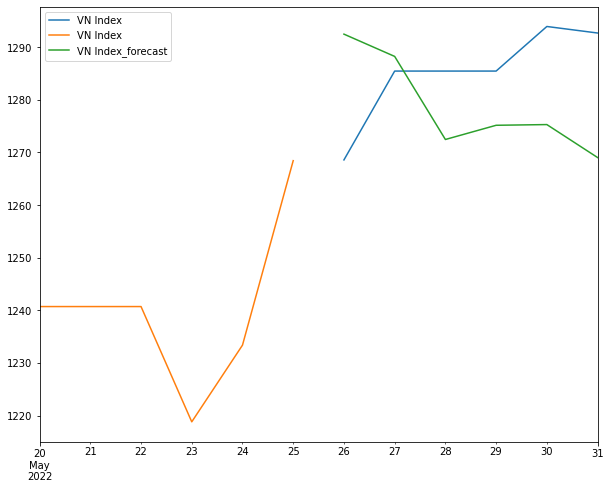

In [64]:
col = 'VN Index'
df_test['VN Index'][-nobs:].plot(legend=True)
df_train['VN Index'][-6:].plot(legend=True)

df_results[col+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
plt.show()

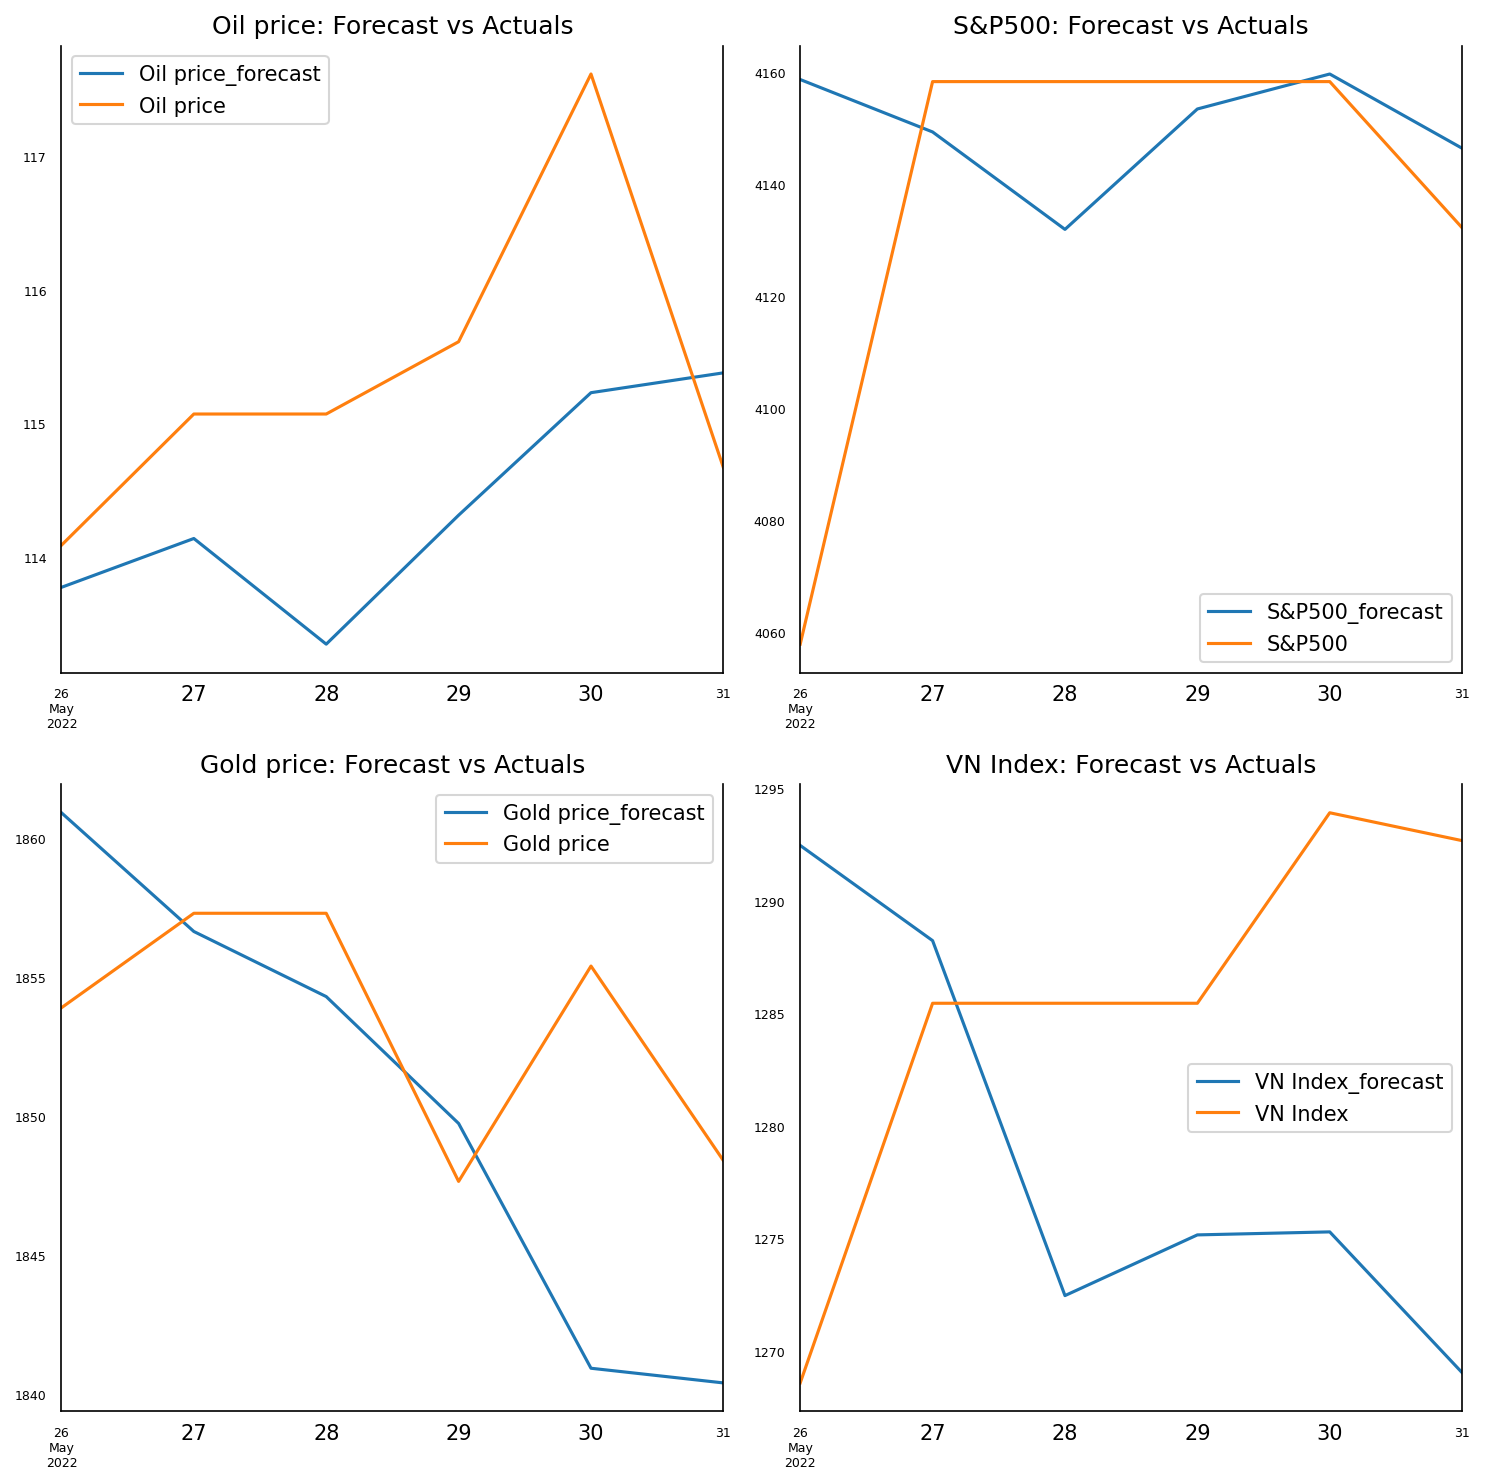

In [65]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax)
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

In [66]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})



In [67]:
print('\nForecast Accuracy of: VN Index')
accuracy_prod = forecast_accuracy(df_results['VN Index_forecast'].values, df_test['VN Index'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))



Forecast Accuracy of: VN Index
mape   :  0.012
me     :  -6.4844
mae    :  15.3781
mpe    :  -0.005
rmse   :  17.1302
corr   :  -0.7834
minmax :  0.0119


C:\Users\ngthn\AppData\Local\Temp\ipykernel_7572\2139281694.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
C:\Users\ngthn\AppData\Local\Temp\ipykernel_7572\2139281694.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)


In [68]:
# def show_graph(df1,df2,title):
#     data = pd.concat([df1, df2])
#     data.reset_index(inplace=True, drop=True)
#     for col in data.columns:
#         if col.Gold priceer().startswith('pred'):
#             data[col].plot(label=col,linestyle="dotted")
#         else:
#             data[col].plot(label=col)
#     plt.title(title)
#     plt.legend()
#     plt.show()


In [69]:
# from statsmodels.tsa.statespace.varmax import VARMAX
# from random import random

# def VARMA_model(train,test):
#     # fit model
#     model = VARMAX(train, order=(1, 2))
#     model_fit = model.fit(disp=False)
#     # make prediction
#     yhat = model_fit.forecast(steps=len(test))
#     res=pd.DataFrame({"Pred1":yhat['Stock_1_diff'], "Pred2":yhat['Act2'], 
#                       "Act1":test["Stock_1_diff"].values, "Act2":test["Act2"].values})
#     return res

# df_ret = VARMA_model(df_train, df_test)
# show_graph(df_train, df_ret, "Vector Autoregression Moving-Average (VARMA)")